In [1]:
import sys
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#The following line makes modules in src/ accessible from the (current) test/ dir
sys.path.append("../src")
import nevh

In [2]:
# Hamiltonian function
def H(t, s, k, m):
    x, p = s
    return 0.5*k*x**2 + 0.5*p**2/m

In [8]:
def hg(t, s, k, m):
    q, p = s
    return [p/m, k*q]

In [11]:
s0 = np.array([0.5,0])   # Initial state: off equilibrium position, at rest
ds = np.ones(2)*0.1      # Integration steps parameters for partial derivatives dH/dq and dH/dp
# Hamiltonian parameters. With k=4\pi^2, m=1, the period is 1
kc = 4 * np.pi**2
mc = 1
tmin = 0; tmax = 5
G = nevh.Hgrad(H, ds, k=kc, m=mc)
#trj = solve_ivp(G, [tmin, tmax], s0, max_step=0.05)

In [12]:
time trj = solve_ivp(G, [tmin, tmax], s0, max_step=0.1)

CPU times: user 43.6 ms, sys: 4.76 ms, total: 48.3 ms
Wall time: 38.8 ms


In [13]:
trj = solve_ivp(hg, [tmin, tmax], s0, args=[kc, 1])

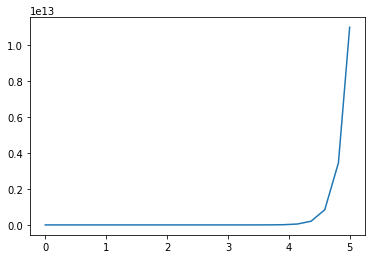

In [14]:
plt.plot(trj.t, trj.y[0])